## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Will Jiang/Desktop/Emory Desktop/BA/Group Project/data/aug_train.csv')
df = df.loc[:, [x for x in df.columns if x not in ['enrollee_id', 'city']]]

In [3]:
#check details of dataset
print(len(df)) #19158
for i in df.columns:
    print(i +': ')
    print(df[i].unique())

19158
city_development_index: 
[0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.893 0.796 0.866 0.682 0.802 0.579 0.878 0.897 0.949 0.925
 0.896 0.836 0.693 0.769 0.775 0.903 0.555 0.727 0.64  0.516 0.743 0.899
 0.915 0.689 0.895 0.89  0.847 0.527 0.766 0.738 0.647 0.795 0.74  0.701
 0.493 0.84  0.691 0.735 0.742 0.479 0.722 0.921 0.848 0.856 0.898 0.83
 0.73  0.68  0.725 0.556 0.448 0.763 0.745 0.645 0.788 0.78  0.512 0.739
 0.563 0.518 0.824 0.487 0.649 0.781 0.625 0.807 0.664]
gender: 
['Male' nan 'Female' 'Other']
relevent_experience: 
['Has relevent experience' 'No relevent experience']
enrolled_university: 
['no_enrollment' 'Full time course' nan 'Part time course']
education_level: 
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline: 
['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
experience: 
['>20' '15' '5' '<1' '11

In [4]:
# Summary Statistics
# summary statistics for numerical variables (mean, sd, min, max, quantiles)
df.describe(include = 'all')

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


<AxesSubplot:>

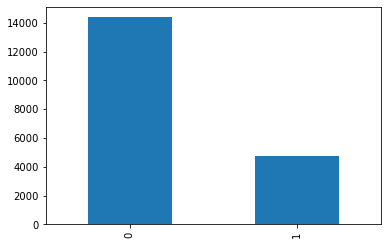

In [5]:
df['target'].value_counts().plot(kind='bar')

C:\Users\Will Jiang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Will Jiang\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


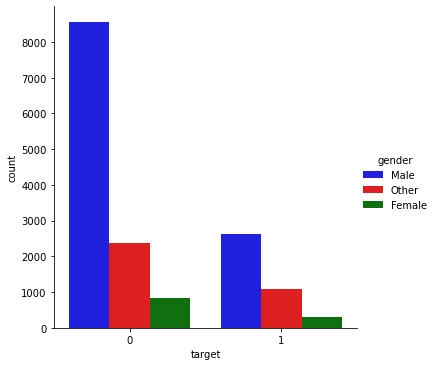

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns


fig, ax = plt.subplots()

sns.catplot("target", hue="gender", data=df, kind="count", 
            palette={'Male':"blue", 'Female':"green", 'Other':'red'}, ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.set_xlabel("Target")

color_patches = [
    Patch(facecolor="blue", label="Male"),
    Patch(facecolor="green", label="Female"),
    Patch(facecolor = 'red', label = 'Other')
]
ax.legend(handles=color_patches)

fig.suptitle("Gender against the target variable");

C:\Users\Will Jiang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Will Jiang\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
<ipython-input-25-aeea829d8216>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["took new job", "did not take new job"])


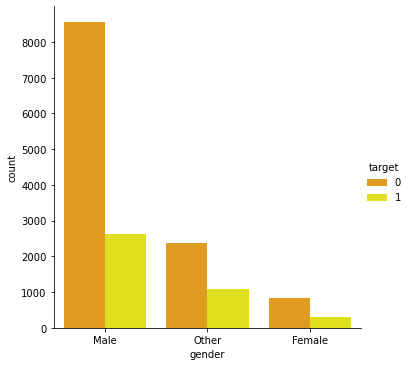

In [25]:
fig, ax = plt.subplots()

sns.catplot("gender", hue="target", data=df, kind="count", 
            palette={1:"yellow", 0:"orange"}, ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="target")
ax.set_xticklabels(["took new job", "did not take new job"])
ax.set_xlabel("")

fig.suptitle("gender and target");





C:\Users\Will Jiang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Will Jiang\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
<ipython-input-26-52707c4ef4c0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["took new job", "did not take new job"])
C:\Users\Will Jiang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arg

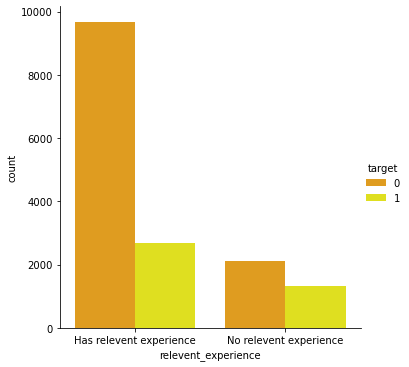

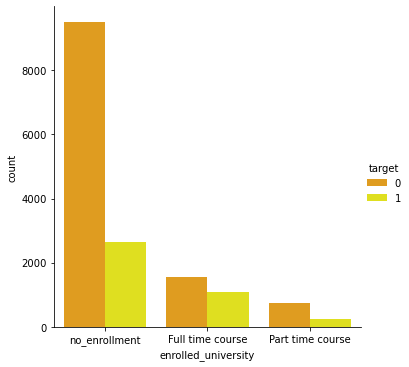

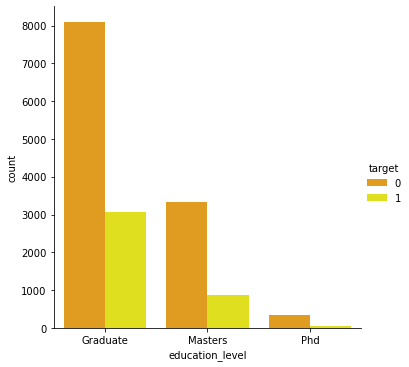

In [26]:
fig, ax = plt.subplots()

sns.catplot("relevent_experience", hue="target", data=df, kind="count", 
            palette={1:"yellow", 0:"orange"}, ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="target")
ax.set_xticklabels(["took new job", "did not take new job"])
ax.set_xlabel("")

fig.suptitle("gender and target");


sns.catplot("enrolled_university", hue="target", data=df, kind="count", 
            palette={1:"yellow", 0:"orange"}, ax=ax)

plt.close(1)

sns.catplot("education_level", hue="target", data=df, kind="count", 
            palette={1:"yellow", 0:"orange"}, ax=ax)

plt.close(1)

In [27]:
df.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
cut_exp                   0
dtype: int64

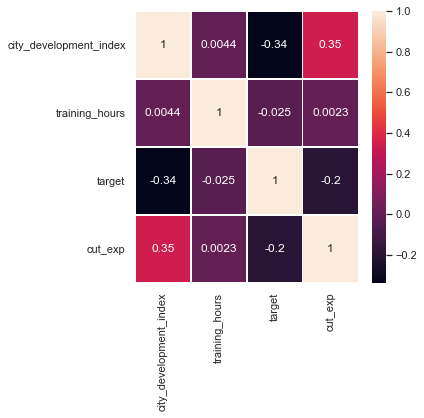

In [28]:
# find correlations among variables
corr_matrix = df.corr()
top_correlated_features = corr_matrix.index
plt.figure(figsize = (5,5))
sns.set(style = "whitegrid")
plot = sns.heatmap(corr_matrix, annot = True, linewidths = .5, annot_kws={"size": 12})

## DATA CLEANING

In [6]:
df.isna().sum()

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### since "education_level","enrolled_university","experience","last_new_job", "major_discipline" have relatively small number of null value, we decide to drop it directly

In [7]:
df.dropna(subset=["education_level","enrolled_university","experience","last_new_job","major_discipline"],inplace = True)

In [8]:
len(df)

15792

In [9]:
df.isna().sum()

city_development_index       0
gender                    3315
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              3993
company_type              4232
last_new_job                 0
training_hours               0
target                       0
dtype: int64

### replace null in "gender" with "Other"

In [10]:
df.gender = df.gender.fillna('Other')

### deal with company_size & company_type (fill in with mode)

In [11]:
df.isna().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              3993
company_type              4232
last_new_job                 0
training_hours               0
target                       0
dtype: int64

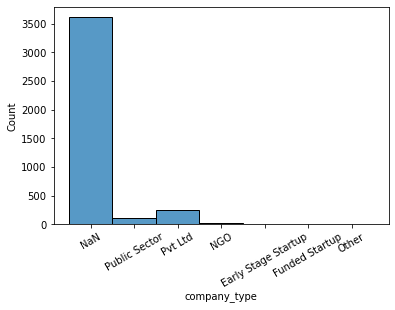

In [12]:
sns.histplot(df.loc[df.company_size.isna(), 'company_type'].replace(np.nan, 'NaN')) 
#those two columns are correlated
#5000 of data points are null in both of the columns
plt.xticks(rotation=30)
plt.show()

In [13]:
print(df.company_type.mode())
print(df.company_size.mode())

0    Pvt Ltd
dtype: object
0    50-99
dtype: object


C:\Users\Will Jiang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


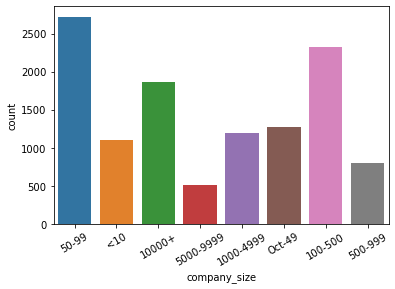

In [14]:
sns.countplot(df.company_size)
plt.xticks(rotation=30)
plt.show()

In [15]:
df["company_type"].fillna(df["company_type"].mode()[0],inplace=True)
df["company_size"].fillna(df["company_size"].mode()[0],inplace=True)

### deal with experience column
### cut experience into 5 levels
### 0-4, 5-10, 11-14, 15-19, >20

C:\Users\Will Jiang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


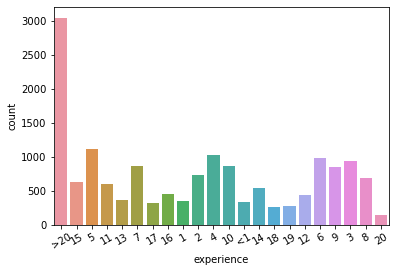

In [16]:
sns.countplot(df.experience)
plt.xticks(rotation=30)
plt.show()

In [17]:
def cut_exp(x):
    if x in ['<1','1','2','3','4']: return 1
    elif x in [str(i) for i in range(5, 10)]: return 2
    elif x in [str(i) for i in range(10, 15)]: return 3
    elif x in [str(i) for i in range(15, 20)]: return 4
    else: return 5

df['cut_exp'] = df['experience'].apply(cut_exp)

In [18]:
df1 = df.copy()
df1[['cut_exp']] = df1[['cut_exp']].astype('object')
df1 = df1.loc[:, [x for x in df1.columns if x != 'experience']]
df1 = pd.get_dummies(df1, drop_first = True)
df1.columns

Index(['city_development_index', 'training_hours', 'target', 'gender_Male',
       'gender_Other', 'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Masters',
       'education_level_Phd', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_50-99',
       'company_size_500-999', 'company_size_5000-9999', 'company_size_<10',
       'company_size_Oct-49', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_2', 'last_new_job_3',
       'last_new_job_4', 'last_new_job_>4', 'last_new_job_never', 'cut_exp_2',
       'cut_exp_3', 'cut_exp_4', 'cut_exp_5'],
      dtype='object')

### balance the data (under-sampling)

In [19]:
X = df1.drop('target', axis=1)
y = df1.target
print(len(y), sum(y))

15792 4004


In [20]:
from sklearn.utils import resample

X_resampled, y_resampled = resample(X[y==0], y[y==0], replace=False, n_samples=X[y==1].shape[0], random_state=42)

In [21]:
X = np.vstack((X_resampled, X[y==1]))
y = np.hstack((y_resampled, y[y==1]))

In [22]:
print(len(y), y.sum())

8008 4004


In [35]:
X

array([[ 0.77, 54.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.92, 36.  ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.62, 78.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.92, 36.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.88, 42.  ,  1.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.92, 52.  ,  1.  , ...,  1.  ,  0.  ,  0.  ]])

# MODELLING

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import plot_confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.preprocessing import StandardScaler

In [24]:
print(X.shape[1], len([x for x in df1.columns if x != 'target']))

35 35


In [25]:
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
#Decision Tree Parameter Tuning
param_tree = {
    'max_depth': range(1,20),
    'criterion':['gini','entropy'],
    'min_samples_leaf':range(1,10),
    'min_samples_split':range(0,10)
}

gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid=param_tree,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)

gs_tree = gs_tree.fit(X,y)
print("Desicion Tree:")
print("Non-nested CV accuracy: ", gs_tree.best_score_)
print("Optimal Parameter: ", gs_tree.best_params_)
print("Optimal Estimator: ", gs_tree.best_estimator_)

# NCV_gs_tree = cross_val_score(gs_tree, X=X, y=y, scoring='accuracy', cv=outer_cv)
# print("Nested CV accuraacy:",NCV_gs_tree.mean(), " +/- ", NCV_gs_tree.std())

Desicion Tree:
Non-nested CV accuracy:  0.7441294883581657
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, random_state=42)


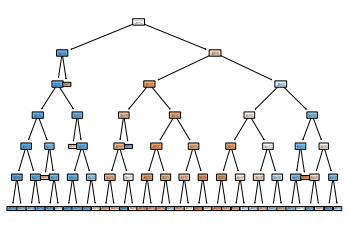

In [27]:
#plot decision tree
plot_tree(gs_tree.best_estimator_,
          rounded = True,
          filled = True)
plt.show()

Confusion matrix, without normalization
[[926 288]
 [292 897]]
Normalized confusion matrix
[[0.76 0.24]
 [0.25 0.75]]


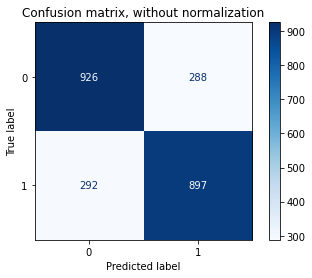

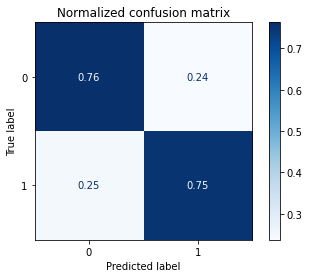

In [28]:
# plot confusion matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size =0.3)

np.set_printoptions(precision=2) #determine floating point on matrix

titles_options = [('Confusion matrix, without normalization', None),
                  ('Normalized confusion matrix', 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gs_tree.best_estimator_, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [29]:
#Logistic Regression Parameter Tuning
pipe_lr = Pipeline([('sc',StandardScaler()),('lr',LogisticRegression(random_state=42))])

param_lr={
    'lr__C':10.0**np.arange(-5,6,1),
    'lr__penalty':['l1','l2']
}

gs_lr = GridSearchCV(estimator=pipe_lr,
                  param_grid=param_lr,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs_lr = gs_lr.fit(X,y)
print("Logistic Regression")
print("Non-nested CV accuracy: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)

# NCV_gs_lr = cross_val_score(gs_lr, X=X, y=y, scoring='accuracy', cv=outer_cv)
# print("Nested CV accuraacy:",NCV_gs_lr.mean(), " +/- ", NCV_gs_lr.std())

Logistic Regression
Non-nested CV accuracy:  0.7050443659978433
Optimal Parameter:  {'lr__C': 0.01, 'lr__penalty': 'l2'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('lr', LogisticRegression(C=0.01, random_state=42))])


In [30]:
#KNN Parameter Tuning
pipe = Pipeline([('sc', StandardScaler()),('knn', KNeighborsClassifier())])

param_knn = {
        'knn__n_neighbors': np.arange(1,50,2),
        'knn__weights': ['uniform', 'distance']
    }

gs_knn = GridSearchCV(estimator=pipe,
                  param_grid=param_knn,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs_knn = gs_knn.fit(X,y) 
print("KNN")
print("Non-nested CV accuracy: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)

# NCV_gs_knn = cross_val_score(gs_knn, X=X, y=y, scoring='accuracy', cv=outer_cv)
# print("Nested CV accuraacy:",NCV_gs_knn.mean(), " +/- ", NCV_gs_knn.std())

KNN
Non-nested CV accuracy:  0.6809438701311057
Optimal Parameter:  {'knn__n_neighbors': 27, 'knn__weights': 'uniform'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=27))])


## **ROC curve**

In [31]:
knn_clf = gs_knn.best_estimator_
lr_clf = gs_lr.best_estimator_
dt_clf = gs_tree.best_estimator_

In [43]:
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [lr_clf, dt_clf, knn_clf]

print('5-fold cross validation:\n')

for clf, label in zip(all_clf, clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf, 
                             X=X,
                             y=y,
                             cv=5,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

ROC AUC: 0.76 (+/- 0.00) [Logistic regression]
ROC AUC: 0.78 (+/- 0.00) [Decision tree]
ROC AUC: 0.73 (+/- 0.01) [kNN]


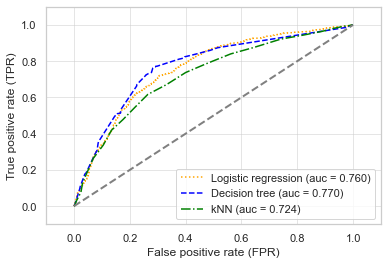

In [44]:
colors = [ 'orange', 'blue', 'green']      
linestyles = [':', '--', '-.', '-']        
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:, 1] 
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)               
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')    
plt.plot([0, 1], [0, 1], 
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

## PREDICTION

In [45]:
msba_sample = np.array([0.9,65,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0])

In [41]:
msba_sample

array([ 0.9, 65. ,  1. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  1. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,
        0. ,  0. ])

In [44]:
y_pred = dt_clf.predict([msba_sample])
y_pred

array([0], dtype=int64)